In [1]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
results_data = pd.read_csv("E:/UCLA/Winter 2024/ECON 441B/Week 3/AAPL_quarterly_financials.csv")
results_data = results_data.set_index("name")
EPS = pd.DataFrame(results_data.loc["BasicEPS", :]).iloc[2:,:]
EPS.index = pd.to_datetime(EPS.index)
EPS = EPS.sort_index().fillna(0.)
EPS

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-06-30,1.2
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [3]:
from pytrends.request import TrendReq

In [4]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Macbook Pro", "Apple Watch", "Apple Earnings", "New iPhone", "US economy", "Steve Jobs", "SF 49ers", "Dallas Cowboys", "Beverly Hills"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [5]:
df = df.resample("Q").mean()
df

,Macbook Pro,Apple Watch,Apple Earnings,New iPhone,US economy,Steve Jobs,SF 49ers,Dallas Cowboys,Beverly Hills
date,,,,,,,,,
2004-03-31,0.000000,0.000000,2.000000,0.000000,75.333333,1.000000,7.666667,10.000000,53.666667
2004-06-30,0.000000,0.000000,0.000000,0.000000,63.333333,1.000000,8.666667,10.666667,49.333333
2004-09-30,0.000000,0.000000,7.000000,0.000000,50.333333,1.000000,14.333333,17.333333,49.000000
2004-12-31,0.000000,0.000000,1.666667,0.000000,75.333333,1.000000,10.333333,15.333333,44.333333
2005-03-31,0.000000,0.000000,4.000000,0.000000,56.333333,1.000000,7.666667,9.000000,50.666667
...,...,...,...,...,...,...,...,...,...
2023-03-31,44.333333,65.333333,25.666667,22.666667,50.666667,1.333333,37.000000,30.333333,33.000000
2023-06-30,38.000000,63.000000,24.666667,21.333333,48.666667,1.000000,11.666667,11.333333,31.333333
2023-09-30,44.000000,71.333333,24.666667,31.333333,39.000000,1.333333,33.333333,27.333333,34.000000


In [6]:
# ALIGN DATA
temp = pd.concat([df, EPS],axis = 1).dropna()
temp

,Macbook Pro,Apple Watch,Apple Earnings,New iPhone,US economy,Steve Jobs,SF 49ers,Dallas Cowboys,Beverly Hills,BasicEPS
2004-03-31,0.000000,0.000000,2.000000,0.000000,75.333333,1.000000,7.666667,10.000000,53.666667,0.002
2004-06-30,0.000000,0.000000,0.000000,0.000000,63.333333,1.000000,8.666667,10.666667,49.333333,0.003
2004-09-30,0.000000,0.000000,7.000000,0.000000,50.333333,1.000000,14.333333,17.333333,49.000000,0.0
2004-12-31,0.000000,0.000000,1.666667,0.000000,75.333333,1.000000,10.333333,15.333333,44.333333,0.013
2005-03-31,0.000000,0.000000,4.000000,0.000000,56.333333,1.000000,7.666667,9.000000,50.666667,0.013
...,...,...,...,...,...,...,...,...,...,...
2022-06-30,47.333333,59.666667,28.333333,24.666667,50.000000,1.333333,13.666667,10.666667,35.000000,1.2
2022-09-30,51.000000,77.666667,25.000000,33.000000,41.000000,1.333333,26.666667,28.000000,37.333333,1.29
2022-12-31,46.666667,82.333333,25.000000,26.666667,47.000000,1.666667,45.333333,52.000000,32.333333,1.89
2023-03-31,44.333333,65.333333,25.666667,22.666667,50.666667,1.333333,37.000000,30.333333,33.000000,1.53


In [24]:
y = pd.DataFrame(temp["BasicEPS"].copy())
X = pd.DataFrame(temp.iloc[:,:-1].copy())
X

,Macbook Pro,Apple Watch,Apple Earnings,New iPhone,US economy,Steve Jobs,SF 49ers,Dallas Cowboys,Beverly Hills
2004-03-31,0.000000,0.000000,2.000000,0.000000,75.333333,1.000000,7.666667,10.000000,53.666667
2004-06-30,0.000000,0.000000,0.000000,0.000000,63.333333,1.000000,8.666667,10.666667,49.333333
2004-09-30,0.000000,0.000000,7.000000,0.000000,50.333333,1.000000,14.333333,17.333333,49.000000
2004-12-31,0.000000,0.000000,1.666667,0.000000,75.333333,1.000000,10.333333,15.333333,44.333333
2005-03-31,0.000000,0.000000,4.000000,0.000000,56.333333,1.000000,7.666667,9.000000,50.666667
...,...,...,...,...,...,...,...,...,...
2022-06-30,47.333333,59.666667,28.333333,24.666667,50.000000,1.333333,13.666667,10.666667,35.000000
2022-09-30,51.000000,77.666667,25.000000,33.000000,41.000000,1.333333,26.666667,28.000000,37.333333
2022-12-31,46.666667,82.333333,25.000000,26.666667,47.000000,1.666667,45.333333,52.000000,32.333333
2023-03-31,44.333333,65.333333,25.666667,22.666667,50.666667,1.333333,37.000000,30.333333,33.000000


# 3.) Normalize all the X data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled.index = X.index
X_scaled

,Macbook Pro,Apple Watch,Apple Earnings,New iPhone,US economy,Steve Jobs,SF 49ers,Dallas Cowboys,Beverly Hills
2004-03-31,-2.084157,-0.828494,-1.761938,-1.628479,2.782144,-0.372315,-1.044145,-1.025932,0.321394
2004-06-30,-2.084157,-0.828494,-1.993759,-1.628479,1.739397,-0.372315,-0.967045,-0.984340,-0.137611
2004-09-30,-2.084157,-0.828494,-1.182386,-1.628479,0.609754,-0.372315,-0.530145,-0.568422,-0.172919
2004-12-31,-2.084157,-0.828494,-1.800575,-1.628479,2.782144,-0.372315,-0.838545,-0.693197,-0.667232
2005-03-31,-2.084157,-0.828494,-1.530117,-1.628479,1.131128,-0.372315,-1.044145,-1.088319,0.003621
...,...,...,...,...,...,...,...,...,...
2022-06-30,-0.011974,1.304145,1.290371,0.017682,0.580789,-0.294873,-0.581545,-0.984340,-1.655858
2022-09-30,0.148548,1.947512,0.904002,0.573818,-0.201271,-0.294873,0.420755,0.097048,-1.408702
2022-12-31,-0.041159,2.114310,0.904002,0.151155,0.320102,-0.217432,1.859955,1.594353,-1.938323
2023-03-31,-0.143309,1.506687,0.981276,-0.115790,0.638720,-0.294873,1.217455,0.242619,-1.867707


# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [27]:
from sklearn.linear_model import Lasso

In [53]:
Lasso_model = Lasso(alpha=0.5)
Lasso_fit = Lasso_model.fit(X_scaled,y)

In [54]:
import numpy as np
Lasso_model_pred = Lasso_model.predict(np.array(X_scaled))
Lasso_model_pred

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155128,
       0.50155128, 0.50155128, 0.50155128, 0.50155128, 0.50155

In [58]:
coefficients = (Lasso_model.coef_).astype(float)
coefficients

array([ 0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.])

In [56]:
import matplotlib.pyplot as plt

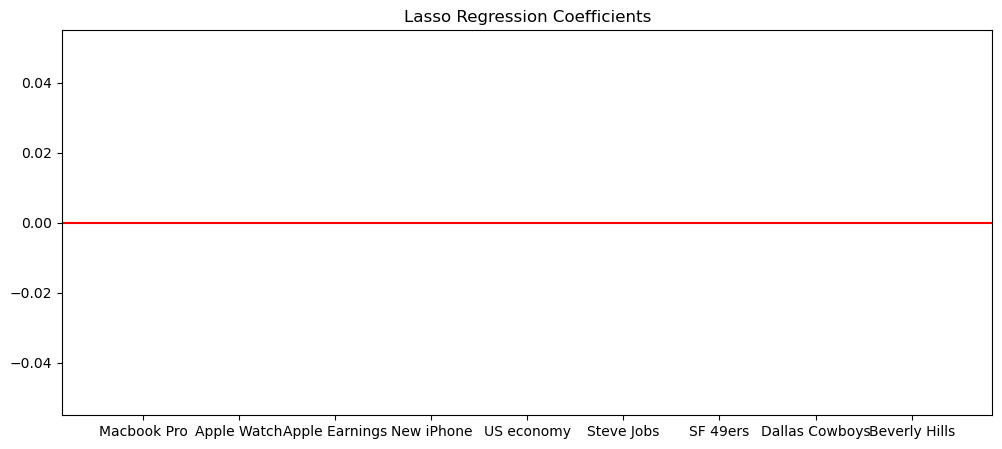

In [57]:
plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color="red")
plt.xticks(range(len(coefficients)), X_scaled.columns)
plt.title('Lasso Regression Coefficients')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

### For my selected indicators of {"Macbook Pro", "Apple Watch", "Apple Earnings", "New iPhone", "US economy", "Steve Jobs", "SF 49ers", "Dallas Cowboys", "Beverly Hills"}, it appears that none of them are great indicators of Apple's Earnings per share in a particular quarter. 

Within this context, the coefficients are such a small magnitude that the y-axis has ticks of 0.02. This is clearly a case of the lambda being set at a level that penalises the data too much. I have recreated the same model below with a far less restrictive Lambda of 0.1. This is in interest of intellectual honesty, as there can be no interpretation for a coefficient magnitude lower than 0.01. 

In [79]:
Lasso_model1 = Lasso(alpha=0.1)
Lasso_fit1 = Lasso_model1.fit(X_scaled,y)

In [80]:
Lasso_model_pred1 = Lasso_model1.predict(np.array(X_scaled))
Lasso_model_pred1

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([0.15508655, 0.15269057, 0.18406257, 0.16095615, 0.1599901 ,
       0.17914042, 0.19741769, 0.17657705, 0.16732683, 0.16244188,
       0.19333139, 0.18001348, 0.17061446, 0.17074465, 0.20796765,
       0.19788157, 0.1778768 , 0.17546222, 0.18573429, 0.18865189,
       0.1640206 , 0.17213933, 0.18889367, 0.20669125, 0.17843756,
       0.18900806, 0.22489412, 0.24049643, 0.2021214 , 0.20119255,
       0.24534419, 0.28349798, 0.30006439, 0.2571381 , 0.29232044,
       0.3310469 , 0.33283301, 0.233512  , 0.27943223, 0.30250339,
       0.26347655, 0.21867309, 0.36771982, 0.35002046, 0.50735988,
       0.73806459, 0.60605302, 0.60650219, 0.49944573, 0.48057245,
       0.58034797, 0.7034965 , 0.60920717, 0.58078328, 0.67913168,
       0.89553237, 0.72532264, 0.7661695 , 0.87409901, 1.02919366,
       0.80075339, 0.76043872, 0.90053086, 1.21623979, 0.95270155,
       0.87969302, 1.04411365, 1.17322002, 1.01210589, 0.96247437,
       1.05292053, 1.32613045, 1.14964912, 0.94318523, 1.18134

In [81]:
coefficients1 = (Lasso_model1.coef_).astype(float)
coefficients1

array([ 0.        ,  0.3322126 ,  0.02115233,  0.        , -0.        ,
        0.        ,  0.03252364,  0.        , -0.        ])

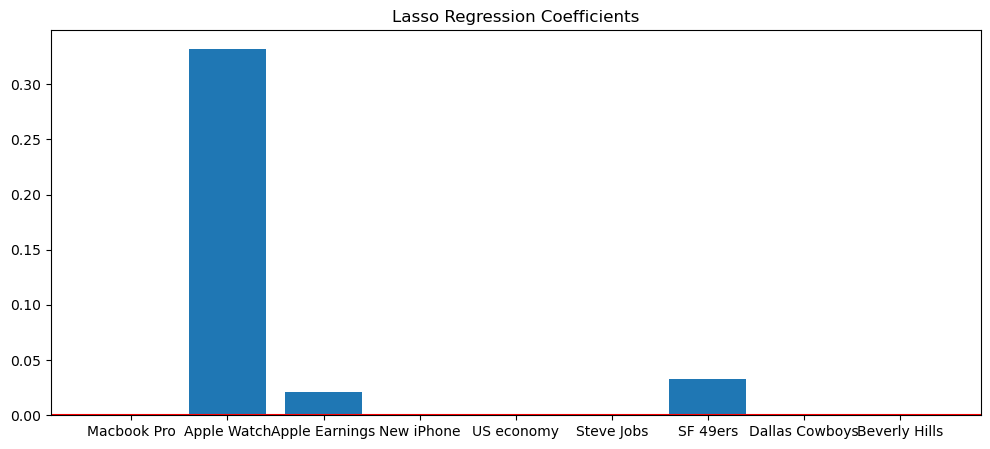

In [82]:
plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients1)), coefficients1)
plt.axhline(0, color="red")
plt.xticks(range(len(coefficients1)), X_scaled.columns)
plt.title('Lasso Regression Coefficients')
plt.show()

### For my selected indicators of {"Macbook Pro", "Apple Watch", "Apple Earnings", "New iPhone", "US economy", "Steve Jobs", "SF 49ers", "Dallas Cowboys", "Beverly Hills"}, it appears that only searches for Apple Watch and Apple Earnings are decent indicators of Apple's Earnings per share in a particular quarter. 

Rather interestingly, with a much more lenient lambda of 0.1, we find that searches for the football team San Francisco 49ers are also supposedly reflective of Apple's quarterly earnings per share. These coefficients are also limited in their insight into 